In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd

<Axes: >

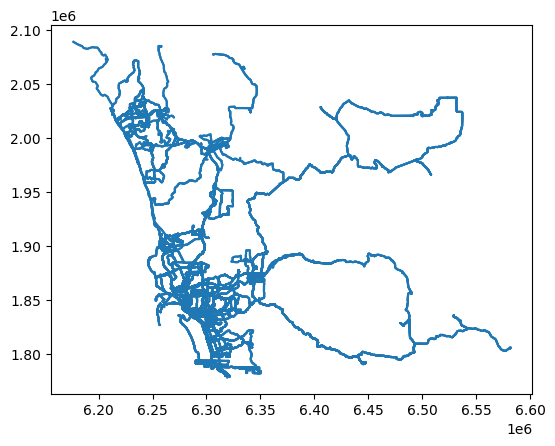

In [5]:
transit_routes = gpd.read_file('..\\Data\\transit_routes_datasd\\transit_routes_datasd.shp')

transit_routes.plot()